At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

Possibilities to test:
- test signficance of weekday vs weekend # rides?
- compute correlation and significance for rides vs. stations, rides. temperature

In [1]:
# import libraries and connect to database
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

### It appears that rides on weekends have a larger mean duration than rides during the week. Test if this is statistically significant

In [34]:
# get average duration of rides for all weekdays
query = "SELECT yday,wkday, AVG(tripduration) as dur_avg FROM rides WHERE year=2015 AND wkday<5 GROUP BY yday"
df1 = pd.read_sql_query(query,con)
df1.head()

,yday,wkday,dur_avg
0,1,3,801.806658
1,2,4,731.240977
2,5,0,637.811802
3,6,1,634.922417
4,7,2,589.210968


/Users/Andy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


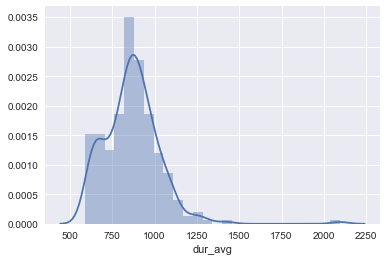

In [35]:
sns.distplot(df1.dur_avg)
#plt.scatter(df1.wkday,df1.N)

In [36]:
# get average duration of rides for all weekend days
query = "SELECT yday,wkday, AVG(tripduration) as dur_avg FROM rides WHERE year=2015 AND wkday>4 GROUP BY yday"
df2 = pd.read_sql_query(query,con)
df2.head()

,yday,wkday,dur_avg
0,3,5,655.284279
1,4,6,679.554211
2,10,5,596.025700
3,11,6,623.072452
4,17,5,657.245628


/Users/Andy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


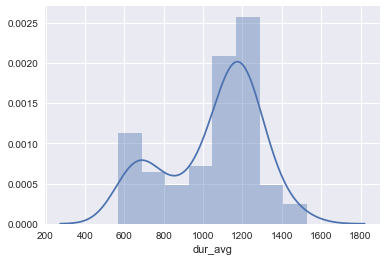

In [37]:
sns.distplot(df2.dur_avg)

In [47]:
import scipy.stats as stats
print(df1.dur_avg.mean(),df2.dur_avg.mean())

867.2768410210001 1053.833457620656


In [45]:
stats.ttest_ind(df1.dur_avg,df2.dur_avg,equal_var=False)

Ttest_indResult(statistic=-7.3858457354214853, pvalue=1.0694451188176493e-11)

### Number of rides vs Temperature

In [3]:
# Get total number rides per day

query = "SELECT yday,count(*) as N FROM rides WHERE year=2015 GROUP BY yday"
df = pd.read_sql_query(query,con)
df.head()

,yday,N
0,1,5317
1,2,11304
2,3,4478
3,4,7849
4,5,14506


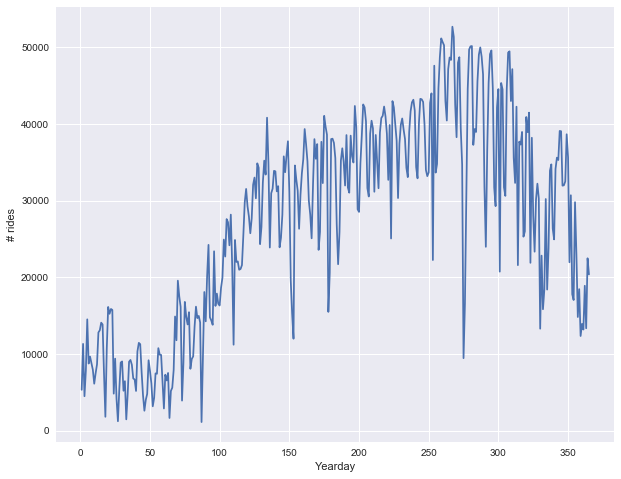

In [8]:
plt.figure(figsize=(10,8))
plt.plot(df.yday,df.N);
plt.xlabel('Yearday')
plt.ylabel('# rides')

In [23]:
# Get daily temperature
con2 = sqlite3.connect("data/nyc_weather.db3")
df2 = pd.read_sql_query("SELECT yday,Mean_TemperatureF as Tmean, Max_TemperatureF as Tmax, Min_TemperatureF as Tmin from temps where year=2015",con2)
df2.head()

,yday,Tmean,Tmax,Tmin
0,1,33,39,27
1,2,39,42,35
2,3,36,41,31
3,4,49,57,41
4,5,36,50,22


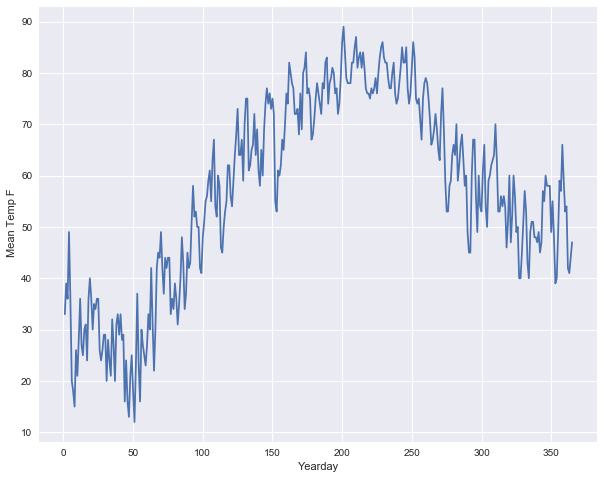

In [24]:
plt.figure(figsize=(10,8))
plt.plot(df2.yday,df2.Tmean)
plt.xlabel('Yearday')
plt.ylabel(' Mean Temp F');

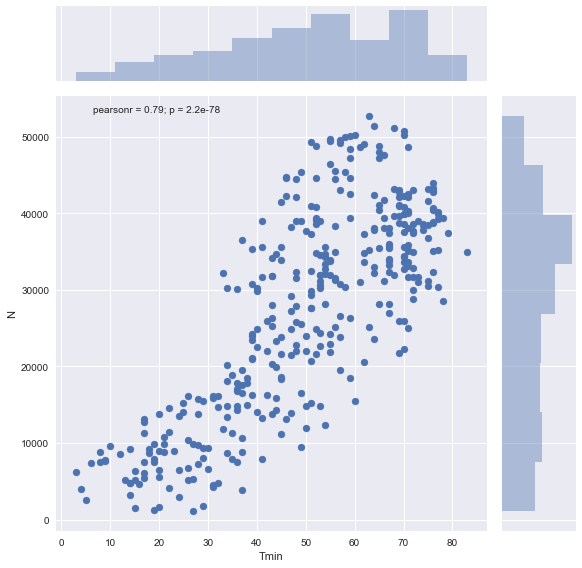

In [27]:
sns.jointplot(df2.Tmean,df.N,size=8)

In [22]:
(df.yday-df2.yday).sum()

0